<img src = "../PES.jpeg" alt="PES" class="bg-primary" height= "75px" width="50px" align = "left">

<img src = "../CIE.jpeg" alt="CIE" class="bg-primary"  height= "100px" width="200px" align = "right">



&copy; Center For Innovation and Entrepreneurship, PES University

Author: Dheemanth R Joshi

Research Assistant, CIE PES University


In [1]:
"""for arrays"""

import numpy as np 

"""for plotting images"""

import matplotlib.pyplot as plt 

"""Parent Library of the PyTorch Framework"""

import torch 

"""Neural Network library of the pytorch module"""

import torch.nn as nn 

"""Torch Dataset Libraries"""

import torchvision 

import torchvision.transforms as transforms 

from torch.utils.data import DataLoader

In [2]:
"""Trains Network on GPU if Available"""

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

In [3]:
"""Network and training parameters for this dataset"""

input_size= 784

batch_size= 100 

num_classes= 10 

In [4]:
"""import the MNIST Dataset and setup the dataloader"""

train_dataset = torchvision.datasets.MNIST('./data', train = True, 
                                           transform= transforms.ToTensor(), download = True)

test_dataset = torchvision.datasets.MNIST('./data', train = False, 
                                           transform= transforms.ToTensor())

train_loader = DataLoader(dataset= train_dataset, batch_size=batch_size, shuffle = True)

test_loader = DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle = True)


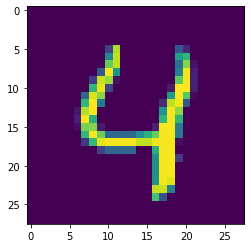

In [5]:
"""View the test dataset"""

image_index = 4

plt.imshow(test_dataset[image_index][0][0])

In [6]:
"""Save test image for inference"""

test_image = test_dataset[image_index][0][0].numpy()

np.savetxt("Desktop/TrainedNetwork/testimage.txt", test_image)


In [7]:
"""Define the Neural Network Architecture"""

class NeuralNet(nn.Module):
    
    def __init__(self, input_size, output_size):
        
        super(NeuralNet, self).__init__()
        
        self.InputLayer = nn.Linear(input_size, 100)
        
        self.relu = nn.ReLU()
        
        self.hl = nn.Linear(100, 100)
        
        self.OutputLayer = nn.Linear(100, output_size)
        
    def forward(self, x):
        
        response = self.InputLayer(x)
        
        response = self.relu(response)
        
        response = self.hl(response)
        
        response = self.relu(response)
        
        response = self.OutputLayer(response)
        
        return response 
        

In [8]:
"""Training: Define Loss and Optimizer"""

model = NeuralNet(input_size, num_classes)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)


In [9]:
"""Training Cond..."""

epochs = 10

n_total_steps = len(train_loader)

for epoch in range(epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.reshape(-1, 28*28).to(device)
        
        labels = labels.to(device)
        
        outs = model(images)
        
        loss = criterion(outs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        """Remove comments to view the epoch v/s loss"""
        
        """if((i+1)%100 == 0):
            
            print(f"epoch{epoch+1}, step{i+1}, loss= {loss.item()}")"""

In [10]:
"""Model Accuracy Testing"""

with torch.no_grad():
    
    corrects = 0
    
    n_samples = 0 
    
    for i, (images, labels) in enumerate(test_loader):
        
        images = images.reshape(-1, 28*28).to(device)
        
        labels = labels.to(device)
        
        outs = model(images)
        
        _, predicted = torch.max(outs, 1)
        
        n_samples += labels.size(0)
        
        corrects += (predicted == labels).sum().item()
    
    accuracy = 100.0 * (corrects/n_samples)
    
    print(f"Accuracy = {accuracy} %")

Accuracy = 97.46000000000001 %


In [11]:
with torch.no_grad():
    
    input_layer_weights = model.InputLayer.weight.numpy()
    
    input_layer_biases = model.InputLayer.bias.numpy()
    
    hl_layer_weights = model.hl.weight.numpy()
    
    hl_layer_biases = model.hl.bias.numpy()
    
    output_layer_weights = model.OutputLayer.weight.numpy()
    
    output_layer_biases = model.OutputLayer.bias.numpy()
    
    np.savetxt("Desktop/TrainedNetwork/in_layer_weights.txt", input_layer_weights)
    
    np.savetxt("Desktop/TrainedNetwork/in_layer_biases.txt", input_layer_biases)
    
    np.savetxt("Desktop/TrainedNetwork/hl_layer_weights.txt", hl_layer_weights)
    
    np.savetxt("Desktop/TrainedNetwork/hl_layer_biases.txt", hl_layer_biases)
    
    np.savetxt("Desktop/TrainedNetwork/out_layer_weights.txt", output_layer_weights)
    
    np.savetxt("Desktop/TrainedNetwork/out_layer_biases.txt", output_layer_biases)
  